In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rc('text', usetex = True)
# matplotlib.rc('font', family = 'serif')
import cPickle as cp
import sys
sys.path.append("../../utils")
from misc_utils import expected_loss
import os
from copy import deepcopy
from plotting_performance_vs_metric import get_closeness, get_log_closeness, get_spectrum
from plotting_performance_vs_metric import get_measurement_metric, get_performance_metric, average_results_array, std_results_array
from plotting_performance_vs_metric import get_nystrom_memory_with_model, get_rff_memory_with_model, get_cir_rff_memory_with_model
from plotting_performance_vs_metric import get_results_for_one_precision, plot_figure
import math
from plot_utils import get_colors

### plot for fixed number of features with different regularizer values

In [9]:
def get_results_for_one_lambda(n_bit_list, general_folder_delta,
                                  folder_pattern, seeds=[1,]):
    delta_list_all = []
    for seed in seeds:
        delta_list = []
        for n_bit in n_bit_list:
            subfolder_name = deepcopy(folder_pattern)
            subfolder_name = subfolder_name.replace("nbit_unk", "nbit_" + str(n_bit) )
            subfolder_name = subfolder_name.replace("seed_unk", "seed_" + str(seed) )
            folder_name = general_folder_delta + "/" + subfolder_name
            file_name = "metric_sample_eval_py2.txt"
            if not os.path.isfile(folder_name + "/" + file_name):
                file_name = "metric_sample_eval.txt"
            metric_name = "Delta"
            delta = get_measurement_metric(folder_name, file_name, metric_name)
            delta_list.append(delta)
                    
        delta_list_all.append(np.array(deepcopy(delta_list) ) )
    return delta_list_all

In [14]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

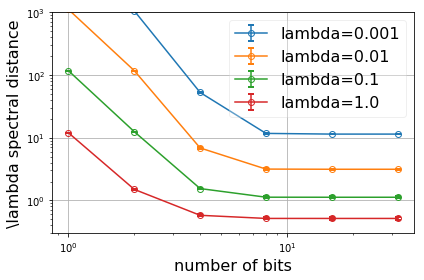

In [30]:
lamb_list = ["0.001", "0.01", "0.1", "1.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_same_num_feature" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_2000_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "lambda=" + lamb
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]
    
plot_figure(delta_dict, color_dict)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
plt.ylim([None, 1e3])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_n_feat.pdf")
plt.show()

### plot for fixed number of features with different regularizer values

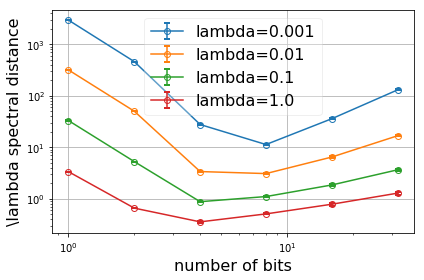

In [31]:
lamb_list = ["0.001", "0.01", "0.1", "1.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_512_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "lambda=" + lamb
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]
    
plot_figure(delta_dict, color_dict)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
# plt.ylim([None, 1e2])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_memory.pdf")
plt.show()